In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [2]:
dataset = pd.read_csv('spam.csv', encoding='latin1')
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
dataset.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
dataset.rename(columns={'v1': 'target', 'v2' : 'Email Text'}, inplace=True)
dataset.head()

,target,Email Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
dataset.duplicated().sum()

403

In [6]:
dataset = dataset.drop_duplicates(keep = 'first')
dataset.head()

,target,Email Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['target'] = encoder.fit_transform(dataset['target'])
dataset.head()

,target,Email Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
import nltk
import re
from textblob import TextBlob
from nltk.tokenize import word_tokenize
import string 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def text_preprocessing(text):
    
    text = text.lower()
    
    pattern = re.compile('<.*?>') #removing HTML tags and URLs
    text = pattern.sub(r'', text)
    
    text = nltk.word_tokenize(text)
    
#     y = []
#     for word in text:
#         if word.isalnum():                 # Removing special characters
#             y.append(word)
#     text = y[:]                   
#     y.clear()
    
    stemmer = PorterStemmer()
    x = []
    for word in text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            x.append(stemmer.stem(word))
    text = x[:]                   
    x.clear()
    
    return " ".join(text)

In [9]:
text_preprocessing("I loved the YT lectures on Machine Learning. What about you?")

'love yt lectur machin learn'

In [10]:
dataset['Processed Text'] = dataset['Email Text'].apply(text_preprocessing)
dataset

,target,Email Text,Processed Text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",nah n't think goe usf live around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tri 2 contact u. u å£750 pound prize ...
5568,0,Will Ì_ b going to esplanade fr home?,ì_ b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",piti mood ... suggest
5570,0,The guy did some bitching but I acted like i'd...,guy bitch act like 'd interest buy someth els ...


In [11]:
#### Top Words in Spam Messages

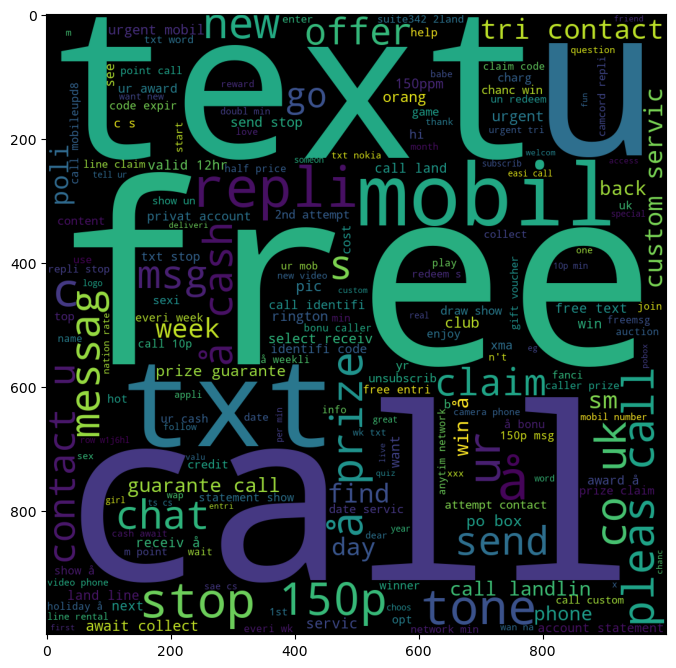

In [12]:
plt.figure(figsize=(8,15))
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='Black')
spam = wc.generate(dataset[dataset['target'] == 1]['Processed Text'].str.cat(sep=" "))
plt.imshow(spam)

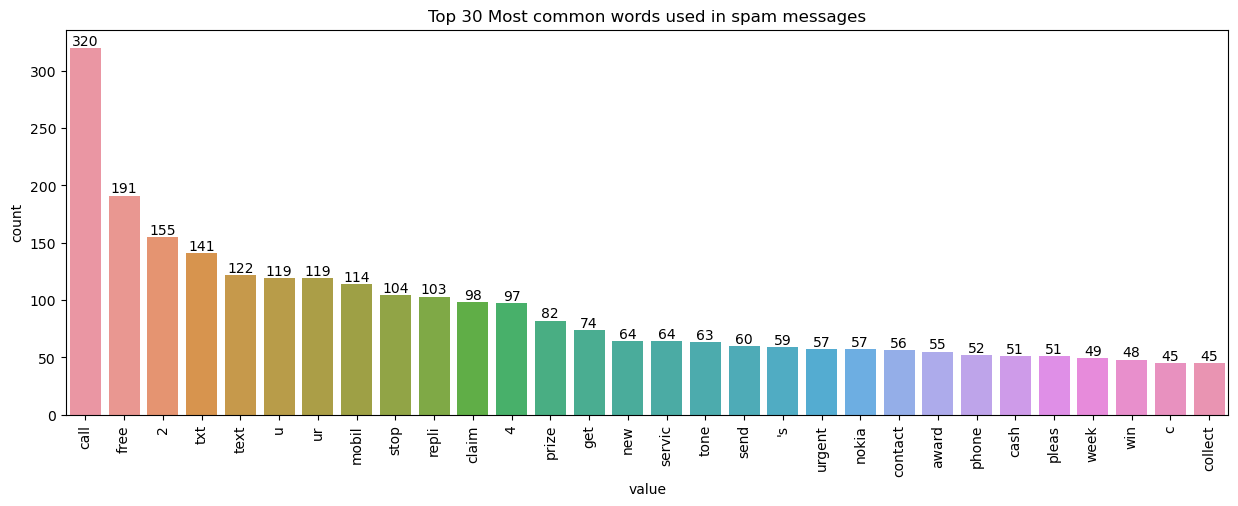

In [13]:
plt.figure(figsize=(15,5))
from collections import Counter      # Use Counter module
spam_words = []
for message in dataset.loc[dataset['target']==1]['Processed Text'].tolist():
    for words in message.split():
        spam_words.append(words)
        
spam_data = pd.DataFrame(Counter(spam_words).most_common(30), columns=['value', 'count'])    # Most 30 common words
ax = sns.barplot(x='value', y='count', data = spam_data)
plt.title('Top 30 Most common words used in spam messages')
plt.xticks(rotation=90)
for bars in ax.containers:
    ax.bar_label(bars)

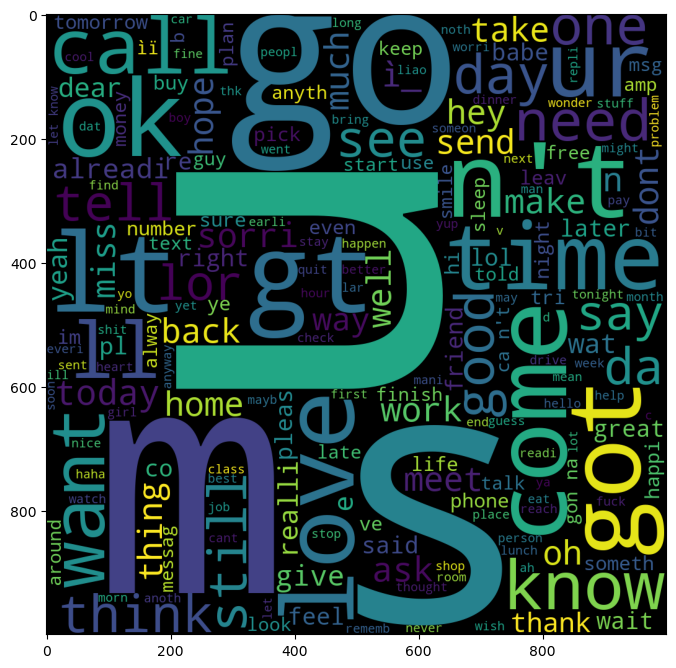

In [14]:
plt.figure(figsize=(8,15))
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='Black')
ham = wc.generate(dataset[dataset['target'] == 0]['Processed Text'].str.cat(sep=" "))
plt.imshow(ham)

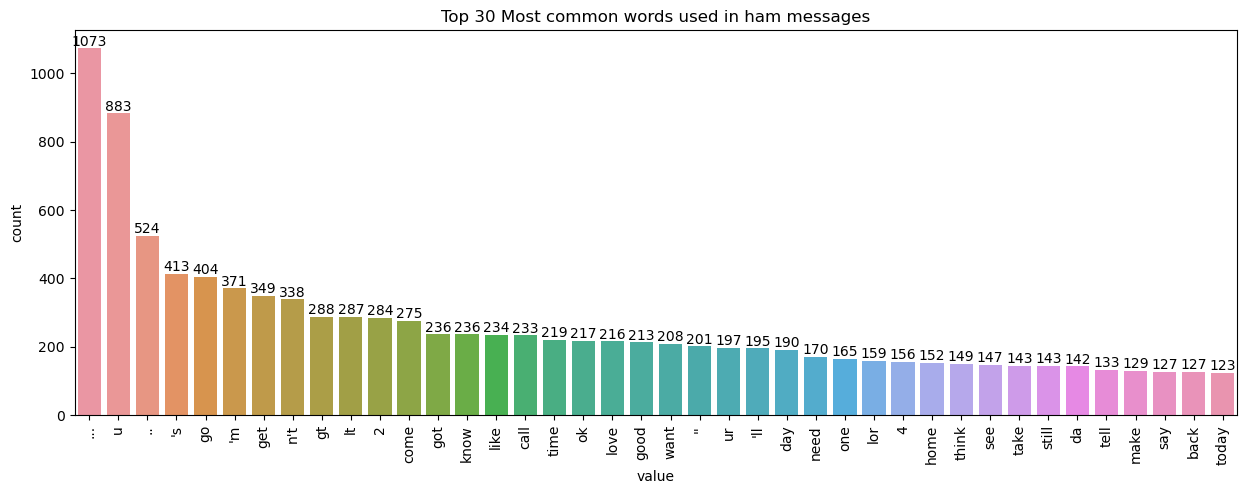

In [15]:
plt.figure(figsize=(15,5))
ham_words = []
for messages in dataset.loc[dataset['target']==0]['Processed Text'].tolist():
    for words in messages.split():
        ham_words.append(words)

ham_data = pd.DataFrame(Counter(ham_words).most_common(40), columns=['value', 'count'])    # Most 30 common words
ax = sns.barplot(x='value', y='count', data = ham_data)
plt.title('Top 30 Most common words used in ham messages')
plt.xticks(rotation=90)
for bars in ax.containers:
    ax.bar_label(bars)

In [16]:
#### Ngrams Implementation

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range = (1,3))

x = vectorizer.fit_transform(dataset['Processed Text']).toarray()

print("SMS:", x.shape[0])
print("Total Words:", x.shape[1])

SMS: 5169
Total Words: 70705


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer2 = CountVectorizer(max_features=4000)

x1 = vectorizer2.fit_transform(dataset['Processed Text']).toarray()

print("SMS:", x1.shape[0])
print("Total Words:", x1.shape[1])

SMS: 5169
Total Words: 4000


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer3 = TfidfVectorizer(max_features=3000)                     # Use max 3000 words

x2 = vectorizer3.fit_transform(dataset['Processed Text']).toarray()

print("SMS:", x2.shape[0])
print("Total Words:", x2.shape[1])

SMS: 5169
Total Words: 3000


In [20]:
y = dataset['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [21]:
#### For Ngrams Model

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

gnb = GaussianNB()                
mnb = MultinomialNB()
bnb = BernoulliNB()

In [23]:
gnb.fit(x_train, y_train)                                         
y_predict = gnb.predict(x_test)
print("accuracy score:", accuracy_score(y_test, y_predict))    
print("confusion_matrix:", confusion_matrix(y_test, y_predict))
print("precision_score:", precision_score(y_test, y_predict)) 

accuracy score: 0.9313346228239845
confusion_matrix: [[835  61]
 [ 10 128]]
precision_score: 0.6772486772486772


In [24]:
mnb.fit(x_train, y_train)                                         
y_predict = mnb.predict(x_test)
print("accuracy score:", accuracy_score(y_test, y_predict))    
print("confusion_matrix:", confusion_matrix(y_test, y_predict))
print("precision_score:", precision_score(y_test, y_predict)) 

accuracy score: 0.9642166344294004
confusion_matrix: [[865  31]
 [  6 132]]
precision_score: 0.8098159509202454


In [25]:
bnb.fit(x_train, y_train)                                         
y_predict = bnb.predict(x_test)
print("accuracy score:", accuracy_score(y_test, y_predict))    
print("confusion_matrix:", confusion_matrix(y_test, y_predict))
print("precision_score:", precision_score(y_test, y_predict)) 

accuracy score: 0.9042553191489362
confusion_matrix: [[896   0]
 [ 99  39]]
precision_score: 1.0


In [26]:
#### For Bag of Words Model

In [27]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=2)

gnb = GaussianNB()                
mnb = MultinomialNB()
bnb = BernoulliNB()

In [28]:
gnb.fit(x1_train, y_train)                                         
y_predict = gnb.predict(x1_test)
print("accuracy score:", accuracy_score(y_test, y_predict))    
print("confusion_matrix:", confusion_matrix(y_test, y_predict))
print("precision_score:", precision_score(y_test, y_predict)) 

accuracy score: 0.8907156673114119
confusion_matrix: [[796 100]
 [ 13 125]]
precision_score: 0.5555555555555556


In [29]:
mnb.fit(x1_train, y_train)                                         
y_predict = mnb.predict(x1_test)
print("accuracy score:", accuracy_score(y_test, y_predict))    
print("confusion_matrix:", confusion_matrix(y_test, y_predict))
print("precision_score:", precision_score(y_test, y_predict)) 

accuracy score: 0.9806576402321083
confusion_matrix: [[886  10]
 [ 10 128]]
precision_score: 0.927536231884058


In [30]:
bnb.fit(x1_train, y_train)                                         
y_predict = bnb.predict(x1_test)
print("accuracy score:", accuracy_score(y_test, y_predict))    
print("confusion_matrix:", confusion_matrix(y_test, y_predict))
print("precision_score:", precision_score(y_test, y_predict)) 

accuracy score: 0.9845261121856866
confusion_matrix: [[896   0]
 [ 16 122]]
precision_score: 1.0


In [31]:
#### For TfIdf Model

In [32]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=2)

gnb = GaussianNB()                
mnb = MultinomialNB()
bnb = BernoulliNB()

In [33]:
gnb.fit(x2_train, y_train)                                        
y_predict = gnb.predict(x2_test)
print("accuracy score:", accuracy_score(y_test, y_predict))     
print("confusion_matrix:", confusion_matrix(y_test, y_predict))
print("precision_score:", precision_score(y_test, y_predict))   

accuracy score: 0.8762088974854932
confusion_matrix: [[787 109]
 [ 19 119]]
precision_score: 0.5219298245614035


In [34]:
mnb.fit(x2_train, y_train)                                        
y_predict = mnb.predict(x2_test)
print("accuracy score:", accuracy_score(y_test, y_predict))     
print("confusion_matrix:", confusion_matrix(y_test, y_predict))
print("precision_score:", precision_score(y_test, y_predict))   

accuracy score: 0.9758220502901354
confusion_matrix: [[896   0]
 [ 25 113]]
precision_score: 1.0


In [35]:
bnb.fit(x2_train, y_train)                                        
y_predict = bnb.predict(x2_test)
print("accuracy score:", accuracy_score(y_test, y_predict))     
print("confusion_matrix:", confusion_matrix(y_test, y_predict))
print("precision_score:", precision_score(y_test, y_predict))   

accuracy score: 0.9874274661508704
confusion_matrix: [[896   0]
 [ 13 125]]
precision_score: 1.0


In [36]:
import pickle  # Import the pickle module for serialization


pickle.dump(vectorizer3, open('vectorizer.pkl', 'wb'))  # Serialize tfidf and save to 'vectorizer.pkl'

# Serialize and save the 'mnb' object to a file named 'model.pkl'
# 'wb' mode is used for writing the file in binary mode
pickle.dump(bnb, open('sms_model.pkl', 'wb'))  # Serialize bnb and save to 'model.pkl'